## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport

### Read Data

In [2]:
file_path = "Tila Muhammad - students_adaptability_level_online_education.csv"
df = pd.read_csv(file_path)
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
df.shape

(1205, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [6]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [7]:
df.duplicated().sum()

949

### Generate Data Profiling Report

In [8]:
Report = ProfileReport(df)

In [9]:
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Encoding

Choose a suitable encoding technique for the columns.

In [10]:
df = df.drop(['Location'], axis=1)
df.shape

(1205, 13)

In [11]:
df["Adaptivity Level"].value_counts()

Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64

### ONE HOT ENCODING FOR NOMINAL DATA

In [12]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender', 'Institution Type', 'IT Student', 'Load-shedding','Internet Type', 'Network Type','Self Lms','Device'], dtype = int)#by default get dummy gives boolean result so we set datatype 
one_hot_encoded_data.head()

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,21-25,University,Mid,3-6,Moderate,1,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,21-25,University,Mid,1-3,Moderate,0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0
2,16-20,College,Mid,1-3,Moderate,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
3,11-15,School,Mid,1-3,Moderate,0,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0
4,16-20,School,Poor,0,Low,0,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0


In [13]:
one_hot_encoded_data.shape

(1205, 23)

In [14]:
df = one_hot_encoded_data

In [15]:
df.head()

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,21-25,University,Mid,3-6,Moderate,1,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,21-25,University,Mid,1-3,Moderate,0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0
2,16-20,College,Mid,1-3,Moderate,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
3,11-15,School,Mid,1-3,Moderate,0,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0
4,16-20,School,Poor,0,Low,0,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0


### Label Encoding for Ordinal Data

In [16]:
df["Adaptivity Level"].value_counts().sort_index()

Adaptivity Level
High        100
Low         480
Moderate    625
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

col = ['Age','Education Level','Financial Condition','Class Duration','Adaptivity Level']

df[col] = df[col].apply(LabelEncoder().fit_transform)

In [18]:
df.head()

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,3,2,0,2,2,1,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,3,2,0,1,2,0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0
2,2,0,0,1,2,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
3,1,1,0,1,2,0,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0
4,2,1,1,0,1,0,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0


### Check distribution

In [19]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

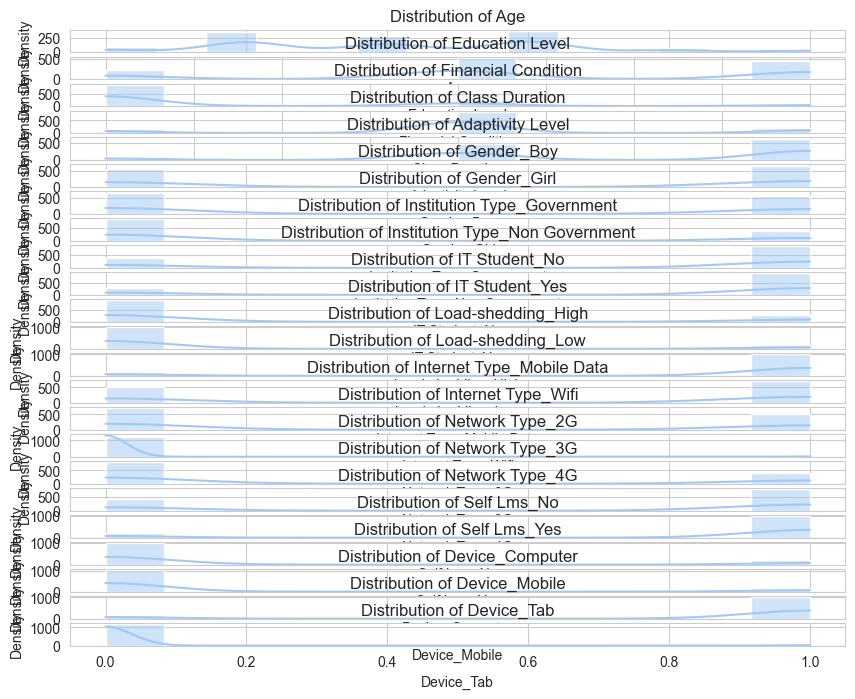

In [20]:
# Set the style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

columns_to_visualize = df.columns

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_visualize), figsize=(10, 8))

# Iterate through each column and plot its distribution
for i, column in enumerate(columns_to_visualize):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [21]:
X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

### Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler and fit_transform your data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[0.6, 1. , 0. , ..., 0. , 0. , 1. ],
       [0.6, 1. , 0. , ..., 0. , 1. , 0. ],
       [0.4, 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0.2, 0.5, 0. , ..., 0. , 1. , 0. ],
       [0.4, 0. , 0. , ..., 0. , 1. , 0. ],
       [0.2, 0.5, 0.5, ..., 0. , 1. , 0. ]])

In [24]:
df_feat = pd.DataFrame(X_scaled,columns=df.columns[:-1])
df_feat.head()

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Load-shedding_Low,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile
0,0.6,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.6,1.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.4,0.0,0.0,0.5,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.2,0.5,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.4,0.5,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
pred = knn.predict(X_test)

### Predictions and Evaluations

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test,pred))

[[14  4  5]
 [ 0 93 10]
 [ 1 16 98]]


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.82      0.90      0.86       103
           2       0.87      0.85      0.86       115

    accuracy                           0.85       241
   macro avg       0.87      0.79      0.82       241
weighted avg       0.85      0.85      0.85       241



In [34]:
#Training Accuracy
print(knn.score(X_train, y_train))

0.8983402489626556


In [35]:
#Testing Accuracy
print(knn.score(X_test, y_test))

0.8506224066390041


#### Check different distance metric

**Euclidean**

In [36]:
#KNeighborsClassifier with Manhattan distance metric

knn_classifier_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

knn_classifier_manhattan.fit(X_train, y_train)

# Predictions
predictions_manhattan = knn_classifier_manhattan.predict(X_test)

#Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_manhattan))

#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions_manhattan))

Confusion Matrix:
[[14  4  5]
 [ 0 93 10]
 [ 1 16 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.82      0.90      0.86       103
           2       0.87      0.85      0.86       115

    accuracy                           0.85       241
   macro avg       0.87      0.79      0.82       241
weighted avg       0.85      0.85      0.85       241



**Manhattan**

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

knn_classifier.fit(X_train, y_train)

# Predictions
predictions = knn_classifier.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

#classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[14  4  5]
 [ 0 93 10]
 [ 1 16 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.82      0.90      0.86       103
           2       0.87      0.85      0.86       115

    accuracy                           0.85       241
   macro avg       0.87      0.79      0.82       241
weighted avg       0.85      0.85      0.85       241



In [38]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.85      0.80      0.82       103
           2       0.78      0.89      0.83       115

    accuracy                           0.82       241
   macro avg       0.84      0.75      0.78       241
weighted avg       0.82      0.82      0.81       241



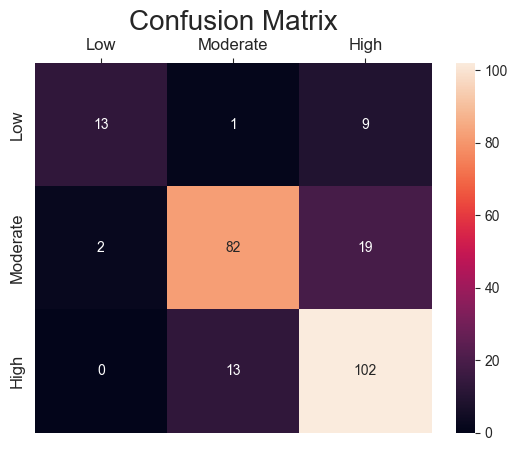

In [39]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
plt.show()

# Decision Tree

**Using Entropy**

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [42]:
from sklearn.metrics import accuracy_score

# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.8796680497925311

In [43]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(classification_report(y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.89      0.90      0.90       103
           2       0.87      0.90      0.89       115

    accuracy                           0.88       241
   macro avg       0.88      0.82      0.84       241
weighted avg       0.88      0.88      0.88       241



**Use Gini Index**

In [44]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

0.8672199170124482

In [46]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.88      0.88      0.88       103
           2       0.85      0.90      0.87       115

    accuracy                           0.87       241
   macro avg       0.87      0.81      0.84       241
weighted avg       0.87      0.87      0.87       241

